In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
import pandas as pd
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

In [9]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


Missing Values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64
Duplicates: 0


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year

In [12]:
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    df[col] = le.fit_transform(df[col])

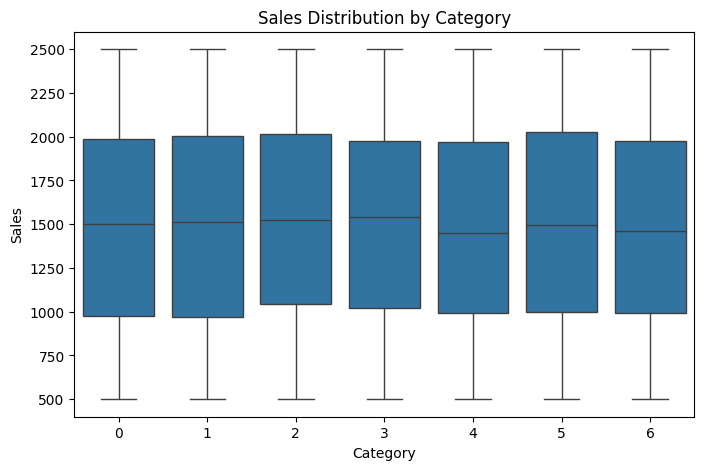

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.show()

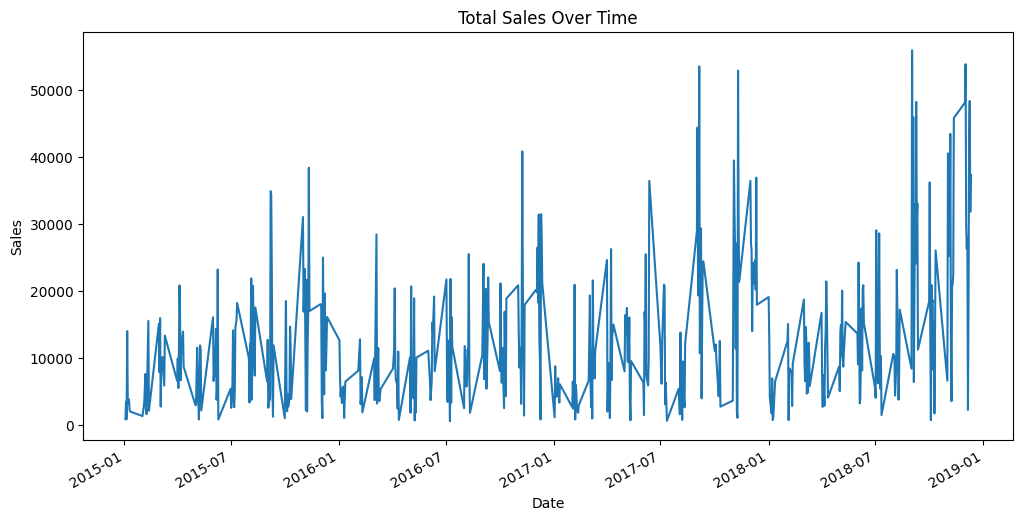

In [14]:
plt.figure(figsize=(12, 6))
df.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

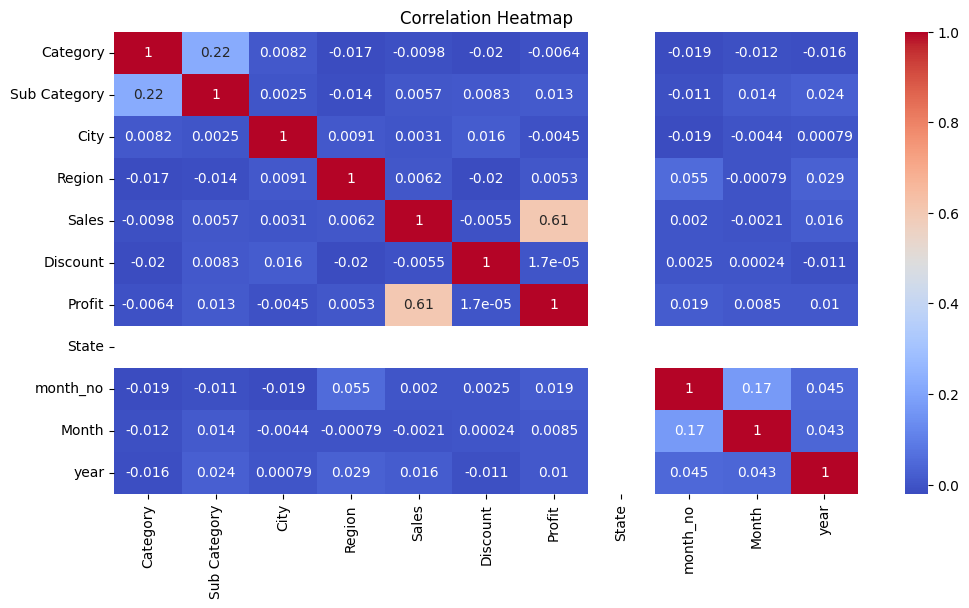

In [15]:
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


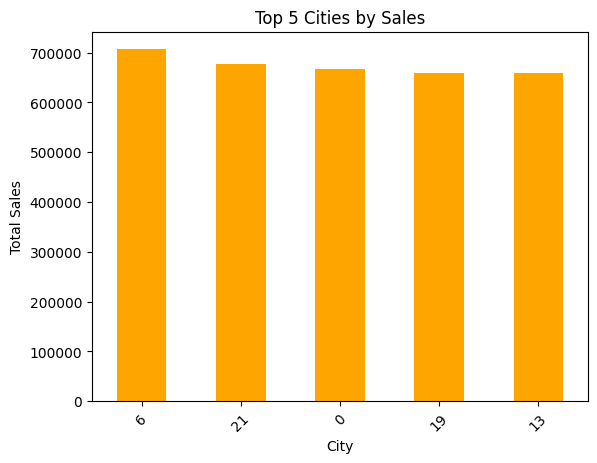

In [16]:
top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)
top_cities.plot(kind='bar', color='orange')
plt.title('Top 5 Cities by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

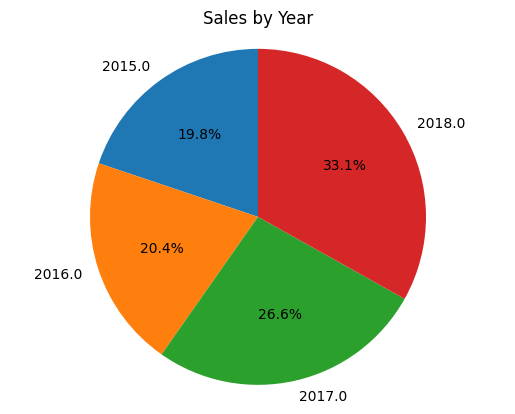

In [17]:
yearly_sales = df.groupby('year')['Sales'].sum()
plt.pie(yearly_sales, labels=yearly_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Year')
plt.axis('equal')
plt.show()

In [18]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')

df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    df[col] = le.fit_transform(df[col])

X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = df['Sales']

print("Any NaNs in X?", X.isnull().values.any())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Any NaNs in X? False
Mean Squared Error: 211684.4854243464
R2 Score: 0.3672081649192521


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R2 Score:", r2_score(y_test, rf_pred))


Random Forest MSE: 222498.34486291718
Random Forest R2 Score: 0.33488212106808823


In [20]:
!pip install xgboost

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("XGBoost R2 Score:", r2_score(y_test, xgb_pred))


XGBoost MSE: 235251.1875
XGBoost R2 Score: 0.29675984382629395


In [21]:
df['Is_Weekend'] = df['Order Date'].dt.dayofweek >= 5

df['Profit_Discount'] = df['Profit'] * df['Discount']


In [22]:
df_encoded = pd.get_dummies(df, columns=['Region', 'Category', 'Sub Category', 'City', 'State', 'Month'], drop_first=True)


In [23]:
import pickle
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [24]:
import os
print(os.listdir())

['.config', 'rf_model.pkl', 'Supermart Grocery Sales - Retail Analytics Dataset.csv', 'sample_data']


In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Category', 'Sub Category', 'City', 'Region', 'State', 'Month']:
    df[col] = le.fit_transform(df[col])


In [26]:
X = df.drop(columns=['Order ID', 'Customer Name', 'Order Date', 'Sales'])
y = df['Sales']


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 212099.2757131288
R2 Score: 0.3659682256412926


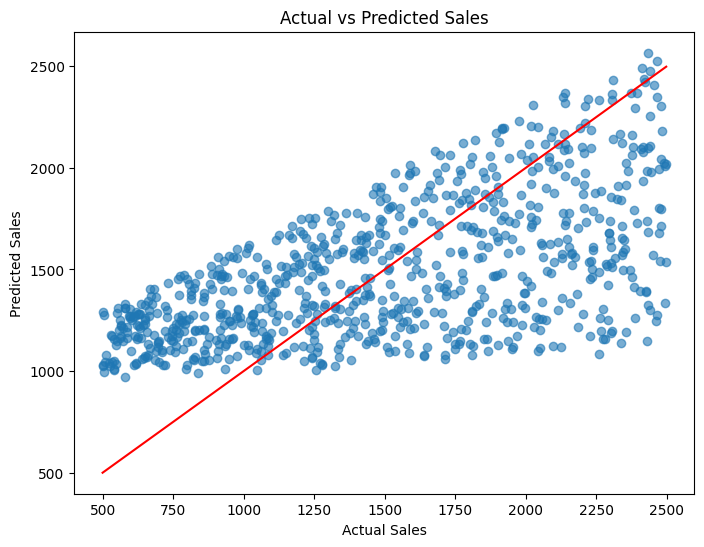

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
print("RF R2 Score:", r2_score(y_test, rf_pred))


RF R2 Score: 0.328563394711172
